<a href="https://colab.research.google.com/github/akifkashif/Health-Insurance-Prediction--Capstone-Project/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import classification_report,confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Text(0.5, 1.0, 'Response')

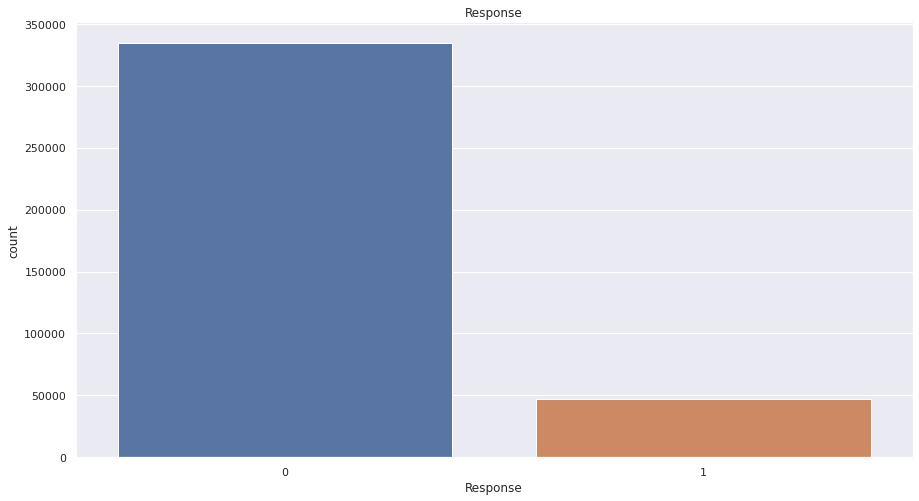

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['Response'])
plt.title('Response')

***There are more number of people who don't prefer to purchase vehicle insurance***.

Text(0.5, 1.0, 'Gender')

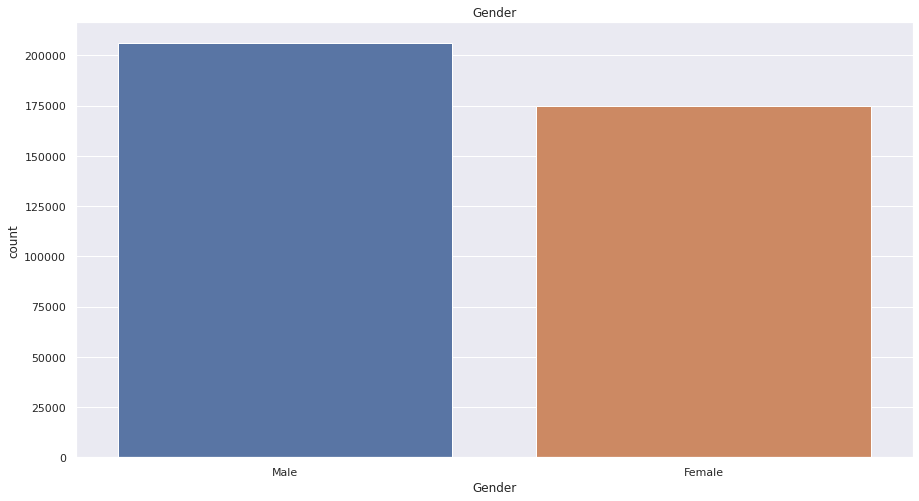

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['Gender'])
plt.title('Gender')

In [ ]:
df_gender =  df.groupby('Gender').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8e1ca7790>],
      dtype=object)

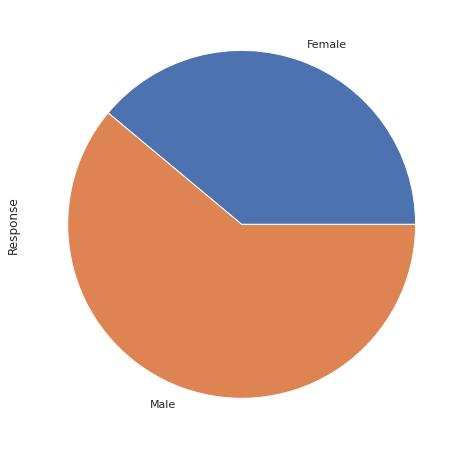

In [ ]:
df_gender.plot(kind='pie', subplots=True, figsize=(8, 8))

***From the Pie charts we can conclude Males were more interested in subscribing to Vehicle Insurance***.

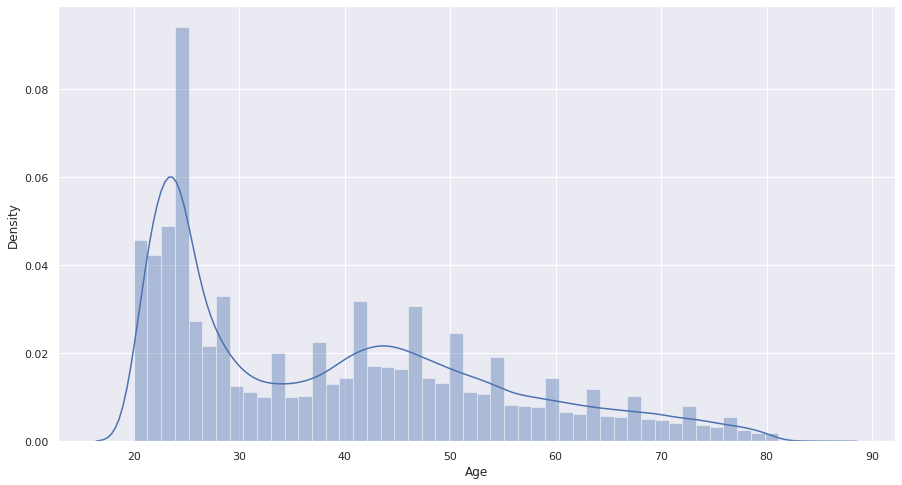

In [ ]:
sns.distplot(df['Age'])

In [ ]:
df_Age =  df.groupby('Age').sum()['Response']

In [ ]:
df_Age

Age
20    171
21    574
22    763
23    892
24    913
     ... 
81      4
82      1
83      1
84      0
85      0
Name: Response, Length: 66, dtype: int64

In [ ]:
# Categorizing Age feature
df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

In [ ]:
df_Age_Group =  df.groupby('Age_Group').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8dc08d8b0>],
      dtype=object)

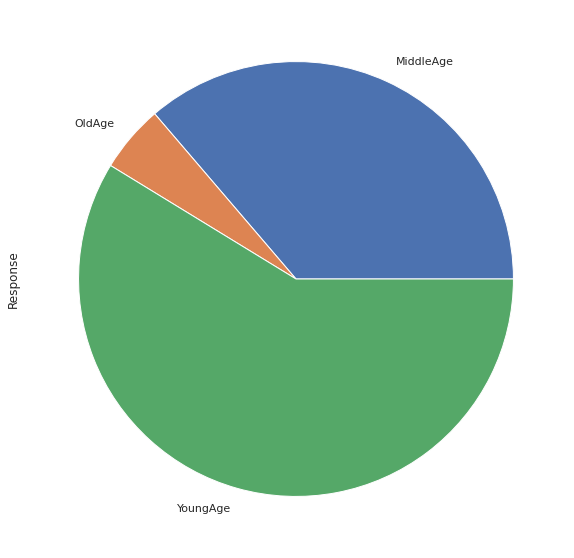

In [ ]:
df_Age_Group.plot(kind='pie', subplots=True, figsize=(10, 10))

***From the plot it is evident that there is a remarkable response regarding Vehicle Insurance from Young Age group because are more conscious about vehicle Insurance because of their reckless driving***.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8df36a6d0>],
      dtype=object)

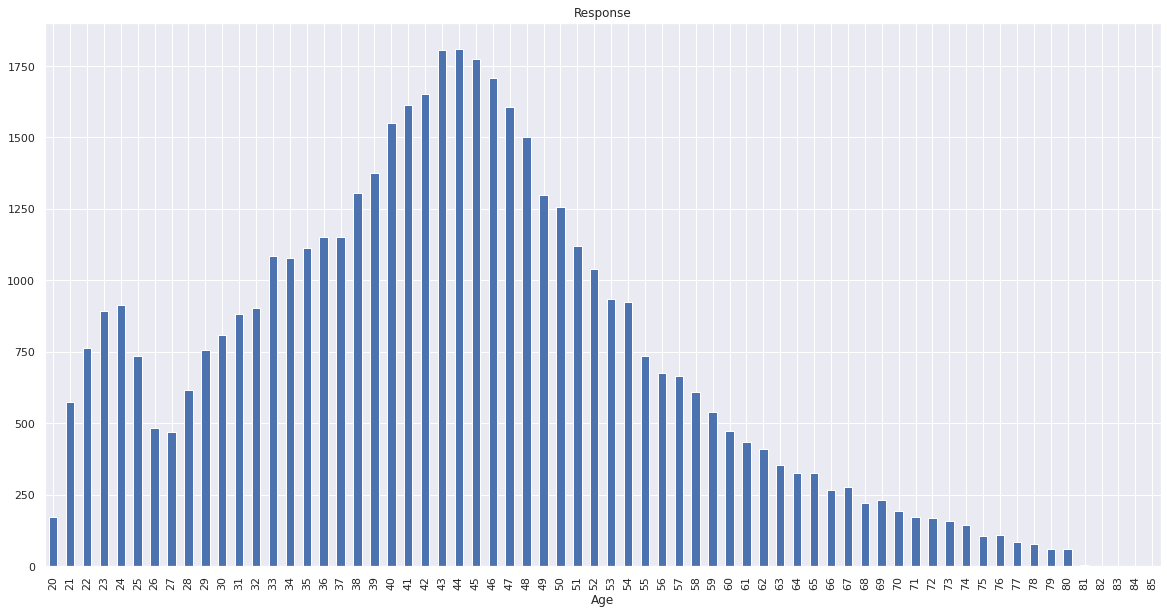

In [ ]:
df_Age.plot(kind='bar', subplots=True, figsize=(20, 10))

***From the plot it is evident that there is a remarkable response regarding Vehicle Insurance from the Age groups 40 to 48***.

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [ ]:
df_License =  df.groupby('Driving_License').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8df194bb0>],
      dtype=object)

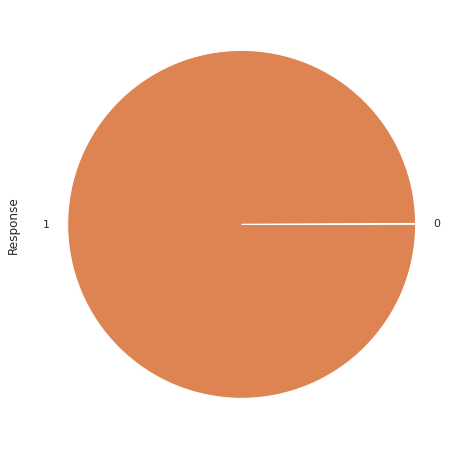

In [ ]:
df_License.plot(kind='pie', subplots=True, figsize=(8, 8))

*People who posses driving license are more likely to get their vehicle insured than that of the people with no driving license*.

In [ ]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [ ]:
df_Previously_Insured =  df.groupby('Previously_Insured').sum()['Response']

In [ ]:
df_Previously_Insured

Previously_Insured
0    46552
1      158
Name: Response, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8ea76bfd0>],
      dtype=object)

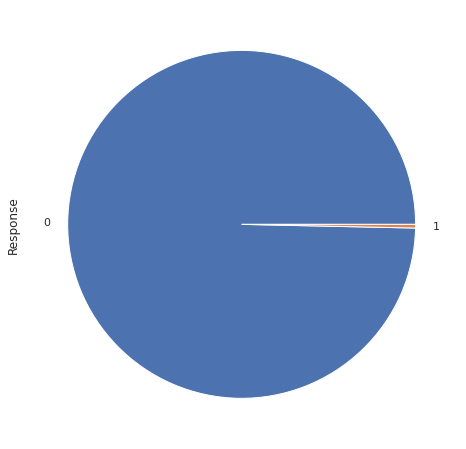

In [ ]:
df_Previously_Insured.plot(kind='pie', subplots=True, figsize=(8, 8))

***This Pie Chart is about the distribution of number of responses by people who are previously insured and not insured. It suggests that people who are not previously insured almost always opt in for vehicle Insurance.***

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
df_Vehicle_Damage =  df.groupby('Vehicle_Damage').sum()['Response']

In [ ]:
df_Vehicle_Damage

Vehicle_Damage
No       982
Yes    45728
Name: Response, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8df11e2e0>],
      dtype=object)

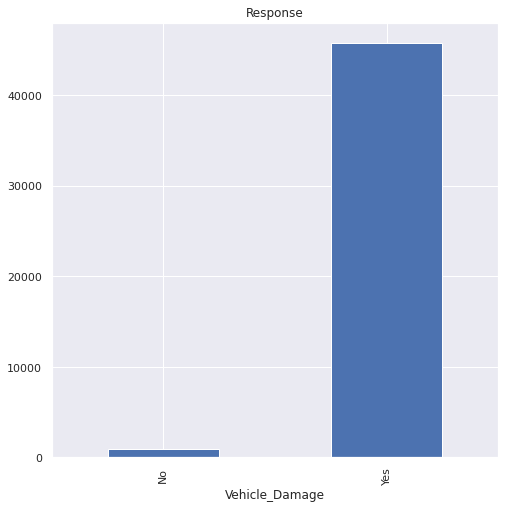

In [ ]:
df_Vehicle_Damage.plot(kind='bar', subplots=True, figsize=(8, 8))

In [ ]:
df['Annual_Premium'].unique()

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.])

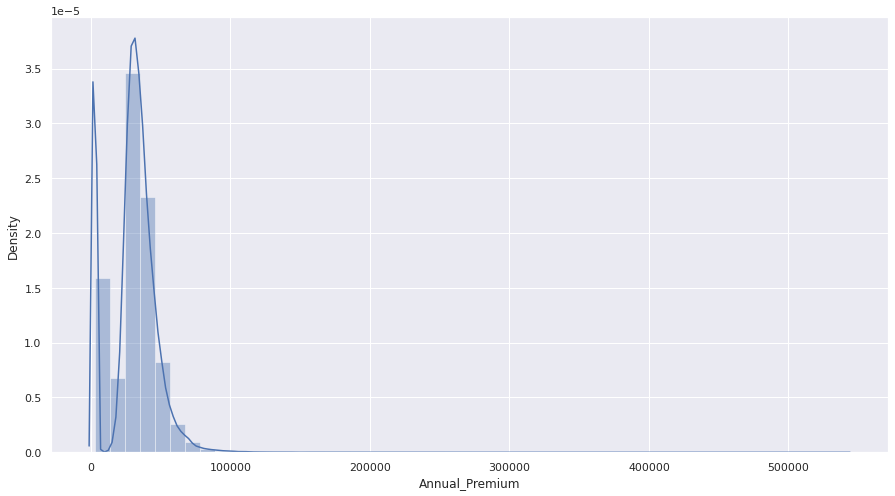

In [ ]:
sns.distplot(df['Annual_Premium'])

In [ ]:
df_Annual_Premium =  df.groupby('Annual_Premium').sum()['Response']

In [ ]:
df_Annual_Premium

Annual_Premium
2630.0      8505
6098.0         0
7670.0         0
8739.0         0
9792.0         0
            ... 
472042.0       2
489663.0       1
495106.0       0
508073.0       0
540165.0       1
Name: Response, Length: 48838, dtype: int64

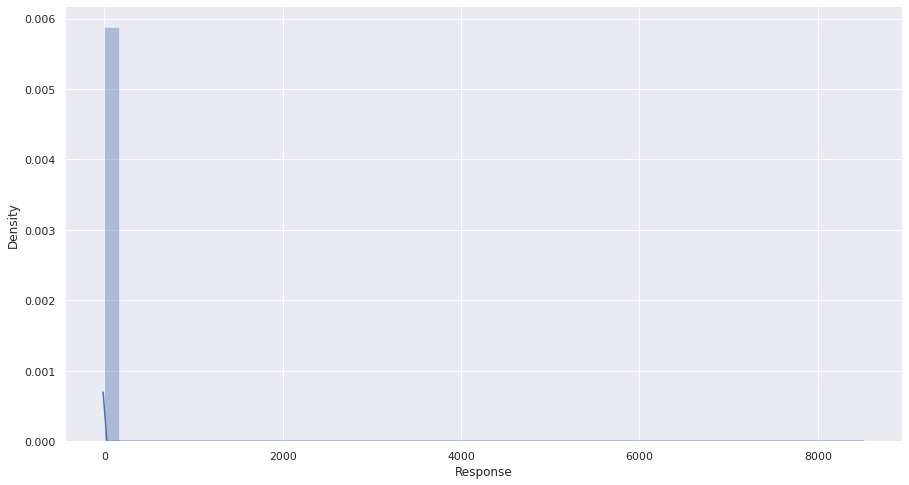

In [ ]:
sns.distplot(df_Annual_Premium)

In [ ]:
df['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

In [ ]:
df_Vintage =  df.groupby('Vintage').sum()['Response']

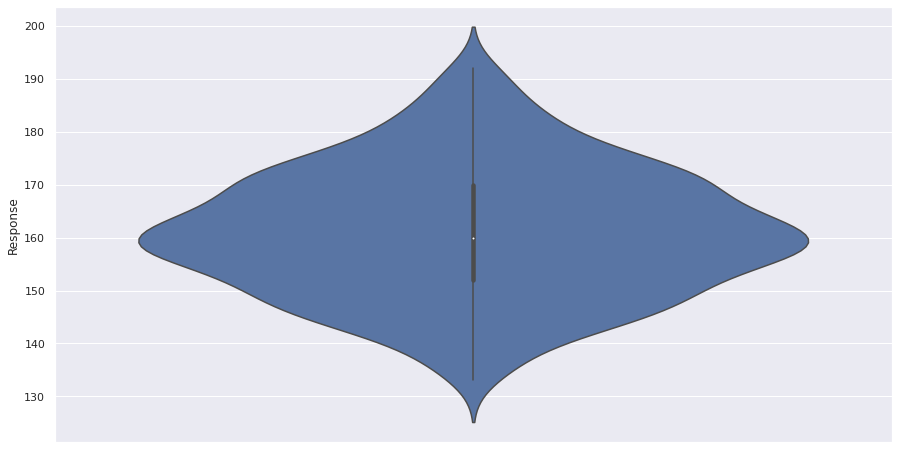

In [ ]:
sns.violinplot(y=df_Vintage)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df['Policy_Sales_Channel'].nunique()

155

In [ ]:
df['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [ ]:
df_Region_code =  df.groupby('Region_Code').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8dc273be0>],
      dtype=object)

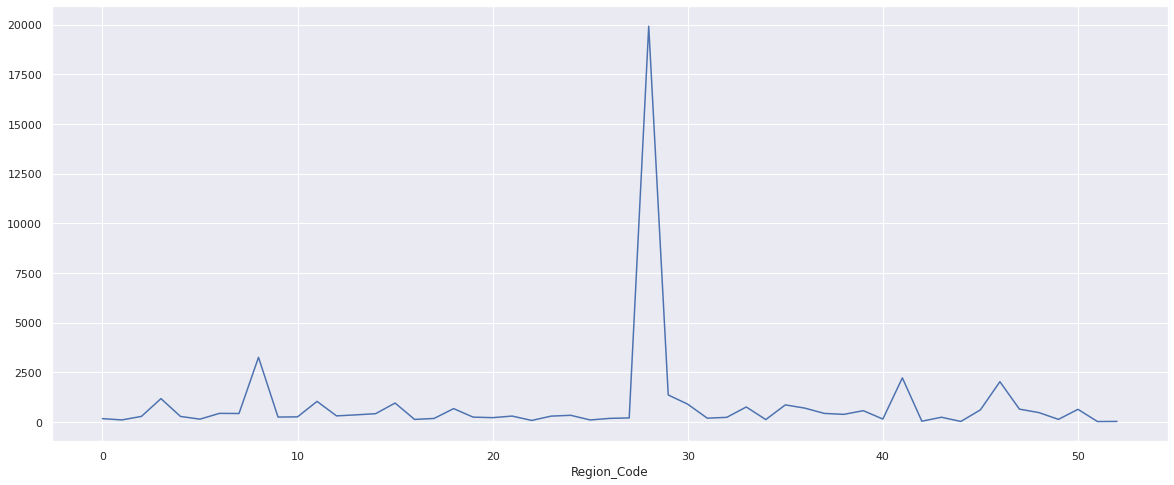

In [ ]:
df_Region_code.plot(kind='line', subplots=True, figsize=(20, 8))

***This Line plot shows the positive responses from the customers across all the regions.There is substantial response from the Area code 28 followed by codes 8 and 46***.

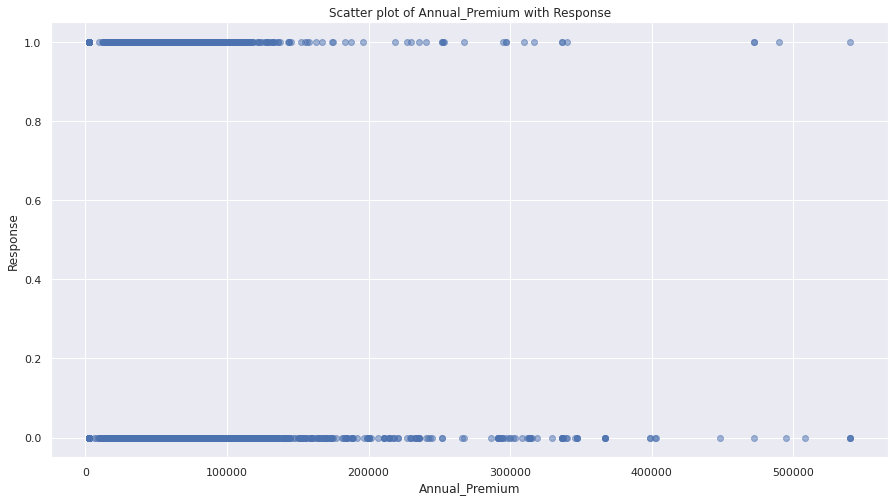

In [ ]:
plt.scatter(df['Annual_Premium'], df['Response'], alpha=0.5)
plt.title('Scatter plot of Annual_Premium with Response')
plt.xlabel('Annual_Premium')
plt.ylabel('Response')
plt.show()

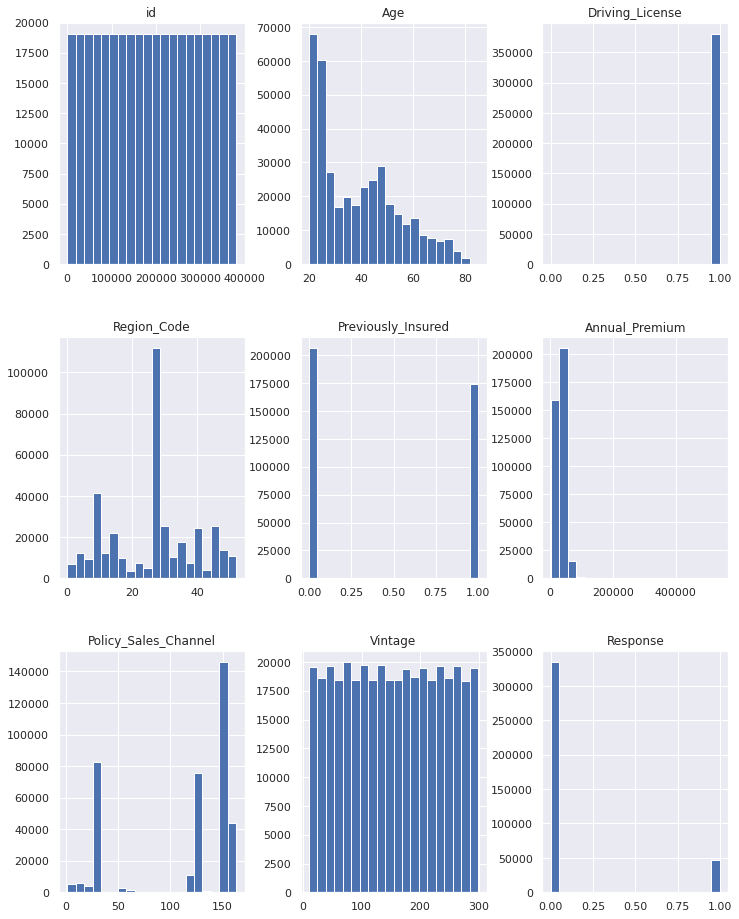

In [ ]:
# Histogram of all the features to understand the distribution
df.hist(bins = 20 , figsize= (12,16)) ;

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
for col in ['Annual_Premium','Age','Vintage']:
  outliers = find_outliers_IQR(df[col])
  print(f"column name is {col}")
  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))
  
  outliers

column name is Annual_Premium
number of outliers: 10320
max outlier value: 540165.0
min outlier value: 61893.0
column name is Age
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is Vintage
number of outliers: 0
max outlier value: nan
min outlier value: nan


In [ ]:
df=df[(df['Annual_Premium'] < 84500.0)]

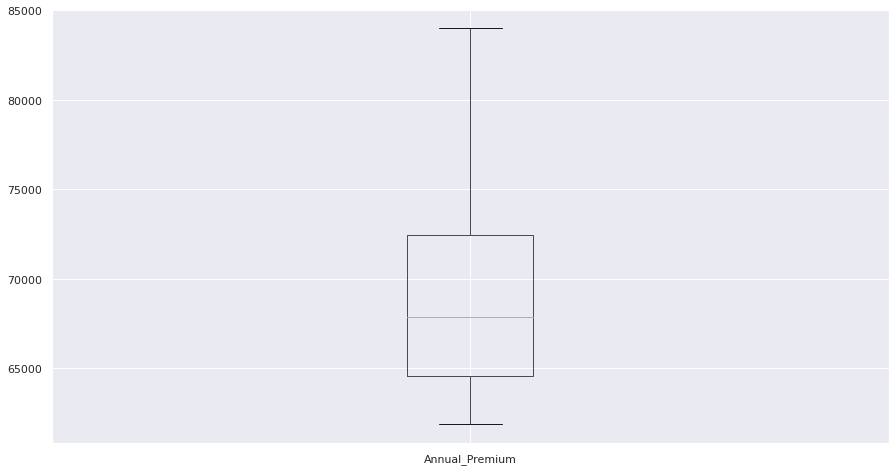

In [ ]:
df.boxplot(column = (['Annual_Premium']))

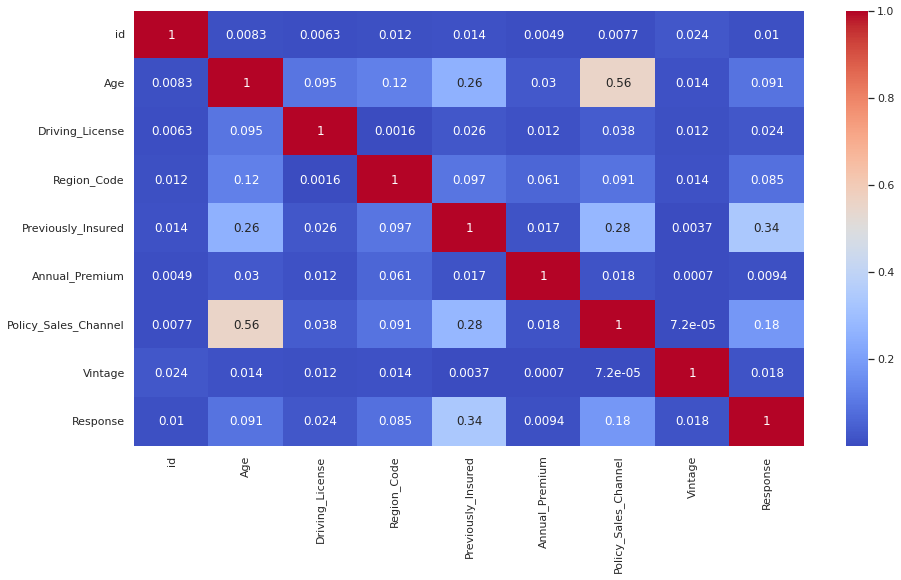

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.989606
1,Age,10.871924
2,Driving_License,99.476184
3,Region_Code,7.337695
4,Previously_Insured,1.833147
5,Annual_Premium,96.099357
6,Policy_Sales_Channel,5.303399
7,Vintage,4.382396


In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0


In [ ]:
df1=df.copy()

In [ ]:
df1 = pd.get_dummies(df1,drop_first=False)

In [ ]:
df1.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
25,26,21,1,28.0,1,61964.0,152.0,72,0,1,0,0,1,0,1,0
37,38,25,1,28.0,1,76251.0,152.0,107,0,1,0,0,1,0,1,0
67,68,60,1,28.0,0,66338.0,124.0,73,0,0,1,1,0,0,0,1
139,140,21,1,29.0,1,62164.0,152.0,116,0,0,1,0,1,0,1,0
149,150,22,1,11.0,1,76651.0,152.0,258,0,1,0,0,1,0,1,0


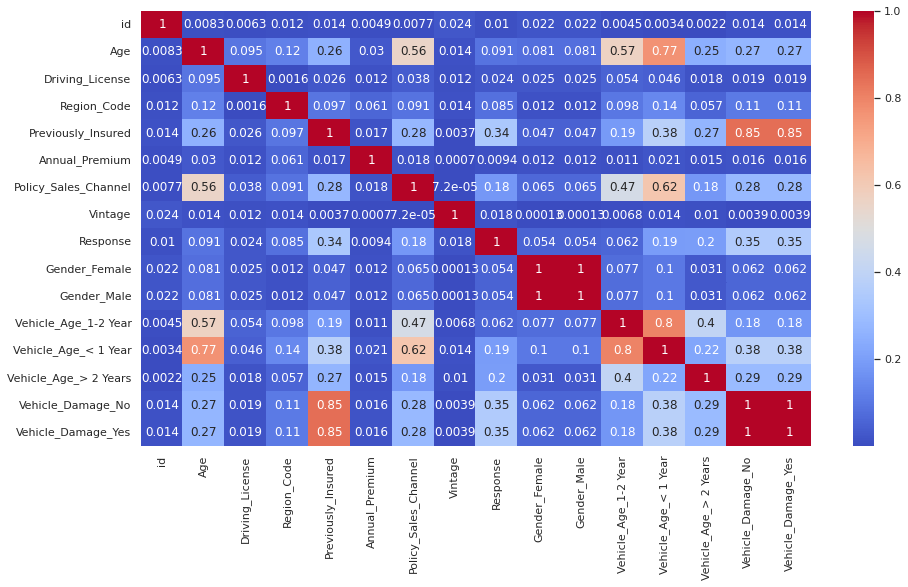

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.001974
1,Age,2.588927
2,Driving_License,1.013800
3,Region_Code,1.029059
4,Previously_Insured,3.568802
5,Annual_Premium,1.004659
6,Policy_Sales_Channel,1.676182
7,Vintage,1.001281
8,Gender_Female,inf
9,Gender_Male,inf


In [ ]:
df1.drop(columns = (['Gender_Female']) , inplace =True)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.001974
1,Age,2.588927
2,Driving_License,1.013800
3,Region_Code,1.029059
4,Previously_Insured,3.568802
5,Annual_Premium,1.004659
6,Policy_Sales_Channel,1.676182
7,Vintage,1.001281
8,Gender_Male,1.013715
9,Vehicle_Age_1-2 Year,inf


In [ ]:
df['Vehicle_Age'].value_counts()

1-2 Year     5014
< 1 Year     2572
> 2 Years     842
Name: Vehicle_Age, dtype: int64

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])


,variables,VIF
0,id,3.995464
1,Age,18.023225
2,Driving_License,106.878197
3,Region_Code,7.372928
4,Previously_Insured,5.856134
5,Annual_Premium,102.397572
6,Policy_Sales_Channel,6.096239
7,Vintage,4.384478
8,Gender_Male,2.279637
9,Vehicle_Age_1-2 Year,7.163930


In [ ]:
df1.drop(columns = (['Vehicle_Age_1-2 Year']) , inplace =True)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.993181
1,Age,18.232677
2,Driving_License,104.560457
3,Region_Code,7.369781
4,Previously_Insured,5.841838
5,Annual_Premium,99.840581
6,Policy_Sales_Channel,6.086955
7,Vintage,4.383858
8,Gender_Male,2.279455
9,Vehicle_Age_< 1 Year,4.178655


In [ ]:
df1.drop(columns = (['Driving_License']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.966094
1,Age,17.252784
2,Region_Code,7.197828
3,Previously_Insured,5.742533
4,Annual_Premium,48.844599
5,Policy_Sales_Channel,6.025508
6,Vintage,4.359234
7,Gender_Male,2.277149
8,Vehicle_Age_1-2 Year,7.006723
9,Vehicle_Age_< 1 Year,7.457735


In [ ]:
df1.drop(columns = (['Annual_Premium']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.829766
1,Age,11.598657
2,Region_Code,6.860586
3,Previously_Insured,5.299275
4,Policy_Sales_Channel,5.684778
5,Vintage,4.215035
6,Gender_Male,2.241946
7,Vehicle_Age_1-2 Year,5.910470
8,Vehicle_Age_< 1 Year,5.432942
9,Vehicle_Damage_Yes,6.806898


In [ ]:
df1.drop(columns = (['Age']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.710166
1,Region_Code,6.266018
2,Previously_Insured,4.559253
3,Policy_Sales_Channel,5.680440
4,Vintage,4.049912
5,Gender_Male,2.205786
6,Vehicle_Age_1-2 Year,5.546333
7,Vehicle_Age_< 1 Year,5.069083
8,Vehicle_Damage_Yes,5.593674


In [ ]:
# Creating the data of independent variables
y = df1['Response']

# Create the dependent variable data
X = df1.drop(columns=['Response'],axis=1).values

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# applying logistic regression model

model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
# getting appropriate predictions on train and test sets

pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

[[5741 1001]
 [   0    0]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive')]

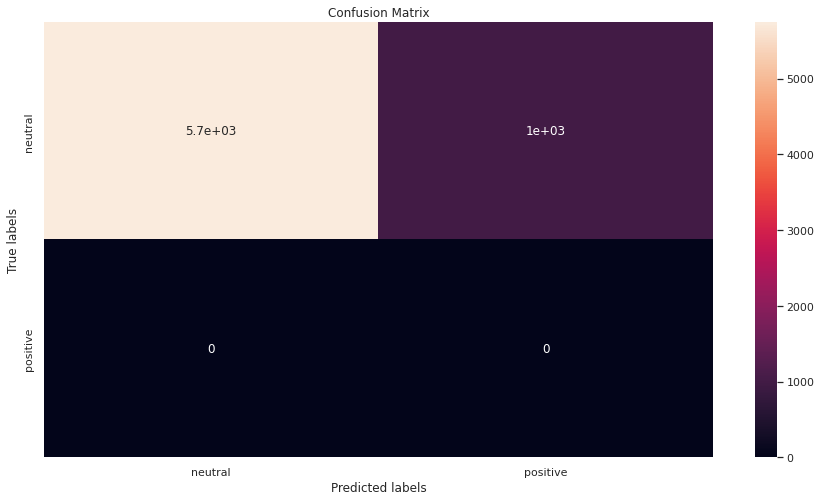

In [ ]:
# getting train set confusion matrix

labels = ['neutral', 'positive','negative']
cm_train = confusion_matrix(pred_train,y_train)
print(cm_train)

ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# getting differant scores of train set

print('Accuracy score of train set: ',accuracy_score(pred_train,y_train))
print('Precision of train set: ',precision_score(pred_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(pred_train,y_train, average = 'weighted'))
print('F1-score of train set: ',f1_score(pred_train, y_train, average='weighted'))

Accuracy score of train set:  0.8515277365766835
Precision of train set:  1.0
Recall of train set:  0.8515277365766835
F1-score of train set:  0.9198109428823198


In [ ]:
# getting differant scores of test set

print('Accuracy score of test set: ',accuracy_score(pred_test,y_test))
print('Precision of test set: ',precision_score(pred_test,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(pred_test,y_test, average = 'weighted'))
print('F1-score of test set: ',f1_score(pred_test, y_test, average='weighted'))

Accuracy score of test set:  0.8505338078291815
Precision of test set:  1.0
Recall of test set:  0.8505338078291815
F1-score of test set:  0.9192307692307693


In [ ]:
# getting classification report for train and test sets

print('Train set report')
print("\n")
print(classification_report(y_train,pred_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,pred_test))

Train set report


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5741
           1       0.00      0.00      0.00      1001

    accuracy                           0.85      6742
   macro avg       0.43      0.50      0.46      6742
weighted avg       0.73      0.85      0.78      6742



Test set report


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1434
           1       0.00      0.00      0.00       252

    accuracy                           0.85      1686
   macro avg       0.43      0.50      0.46      1686
weighted avg       0.72      0.85      0.78      1686



In [ ]:
r2_linear_test = r2_score(y_test,pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : -0.17573221757322144
Adjusted R2 :  -0.1820458154002853


In [ ]:
# training the model

from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

predictions_test = dtree_model.predict(X_test)
predictions_train = dtree_model.predict(X_train)

In [ ]:
# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.16011860840529338 with max depth 4


The best R2 test score is : 0.155073262350632 with max depth = 4


[[5741 1001]
 [   0    0]]


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

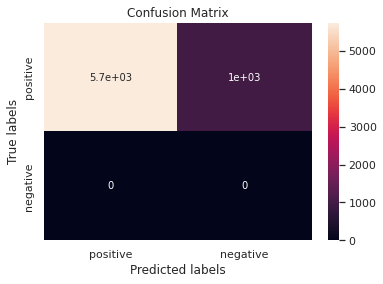

In [ ]:
# getting train set confusion matrix

labels = ['positive','negative']
cm_test = confusion_matrix(predictions_train,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


[[1434  252]
 [   0    0]]


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

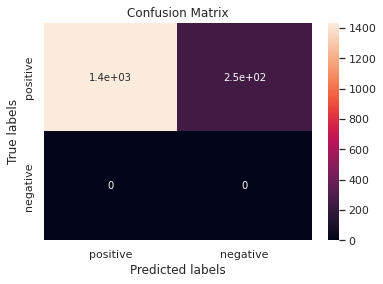

In [ ]:
# getting test set confusion matrix

labels = ['positive','negative']
cm_test = confusion_matrix(predictions_test,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Print the classification report for train and test

print('Train set report')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,predictions_test))

Train set report


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5741
           1       0.00      0.00      0.00      1001

    accuracy                           0.85      6742
   macro avg       0.43      0.50      0.46      6742
weighted avg       0.73      0.85      0.78      6742



Test set report


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1434
           1       0.00      0.00      0.00       252

    accuracy                           0.85      1686
   macro avg       0.43      0.50      0.46      1686
weighted avg       0.72      0.85      0.78      1686

